<a href="https://colab.research.google.com/github/Elnurl/DataScience/blob/main/TenserflowClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [5]:
df=pd.read_csv('./cancer_classification.csv')

In [ ]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [7]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


<Axes: xlabel='benign_0__mal_1', ylabel='count'>

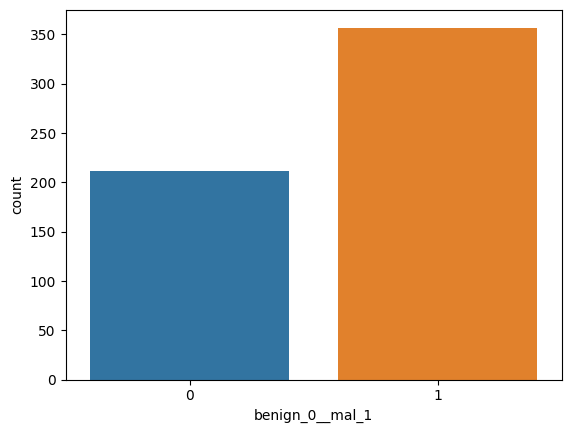

In [8]:
sns.countplot(x='benign_0__mal_1', data=df)

In [9]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

<Axes: >

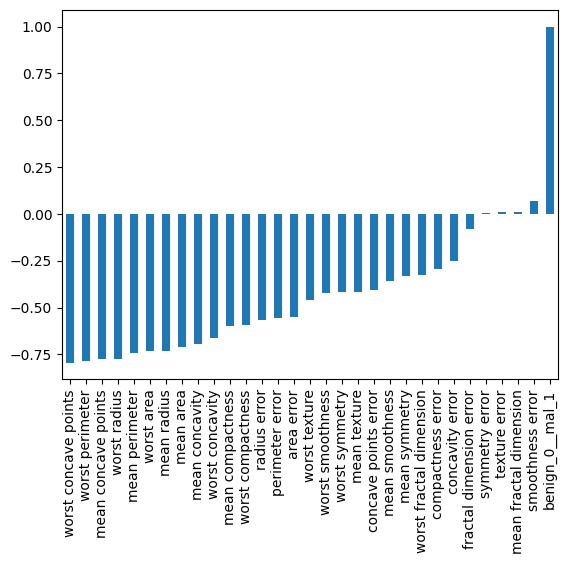

In [10]:
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')


<Axes: >

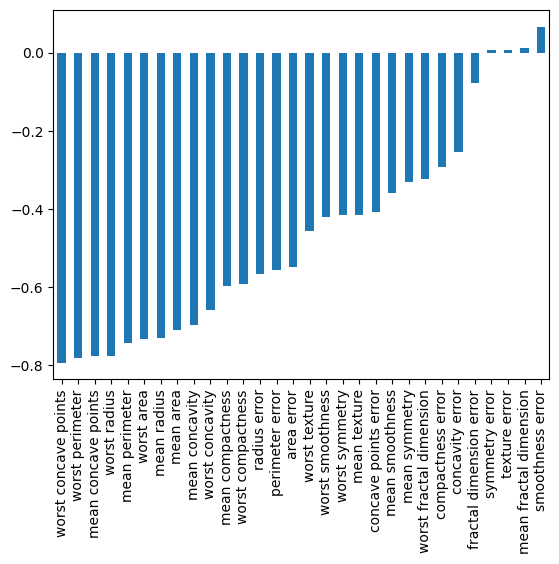

In [11]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')


In [12]:
X=df.drop('benign_0__mal_1',axis=1).values
y=df['benign_0__mal_1'].values

In [13]:
from sklearn.model_selection import train_test_split


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler=MinMaxScaler()

In [17]:
X_train=scaler.fit_transform(X_train)

In [18]:
X_test=scaler.fit_transform(X_test)

In [19]:
from tensorflow.keras.models import  Sequential

In [20]:
from tensorflow.keras.layers import Dense,Dropout

In [21]:
X_train.shape

(426, 30)

In [25]:
model=Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(1,activation="sigmoid"))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [ ]:
from sklearn.utils import validation
model.fit(x=X_train,y=y_train,epochs=600, validation_data=(X_test,y_test))

In [30]:
losses=model.history.history
loss=pd.DataFrame(losses)

<Axes: >

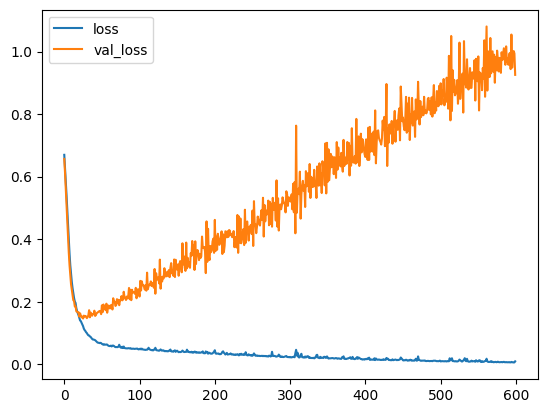

In [31]:
loss.plot()

In [47]:
model= Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(1,activation="sigmoid"))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [48]:
from tensorflow.keras.callbacks import EarlyStopping

In [36]:
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [ ]:
model.fit(x=X_train,y=y_train,epochs=600, validation_data=(X_test,y_test),
                 callbacks=[early_stop]           )

In [38]:
model_loss=pd.DataFrame(model.history.history)

In [ ]:
model_loss

<Axes: >

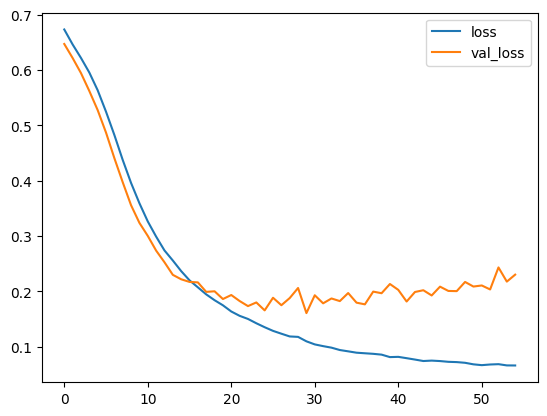

In [40]:
model_loss.plot()

In [49]:
from tensorflow.keras.layers import Dropout

In [51]:
model= Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation="sigmoid"))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [52]:
model.fit(x=X_train,y=y_train,epochs=600, validation_data=(X_test,y_test),
                 callbacks=[early_stop]           )

Epoch 1/600
14/14 [==============================] - 2s 25ms/step - loss: 0.7207 - val_loss: 0.6824
Epoch 2/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6858 - val_loss: 0.6551
Epoch 3/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6769 - val_loss: 0.6312
Epoch 4/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6490 - val_loss: 0.6061
Epoch 5/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6388 - val_loss: 0.5780
Epoch 6/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6137 - val_loss: 0.5528
Epoch 7/600
14/14 [==============================] - 0s 7ms/step - loss: 0.5824 - val_loss: 0.5216
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5495 - val_loss: 0.4827
Epoch 9/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5588 - val_loss: 0.4550
Epoch 10/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5212 - val_loss: 0.4299
Epoch 11

In [53]:
model_loss=pd.DataFrame(model.history.history)

<Axes: >

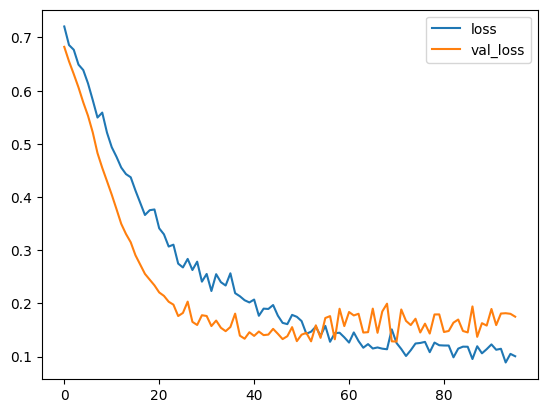

In [54]:
model_loss.plot()

In [82]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

5/5 [==============================] - 0s 3ms/step


In [83]:
from sklearn.metrics import classification_report, confusion_matrix

In [84]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90        55
           1       0.99      0.88      0.93        88

    accuracy                           0.92       143
   macro avg       0.91      0.93      0.91       143
weighted avg       0.93      0.92      0.92       143



In [85]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [11 77]]
